Trasformaciones de intensidad y filtrado espacial
---------------------------------------------------------
--------------------------------------------------

Cuando nos referimos al filtrado espacial estamos hablando del plano(Cartesiano casi siempre) en el que se enmarcan las imagenes,  los metodos que se encuentran en esta categoria estan basados en la manipulación directa de los pixels en la imagen. Las dos categorias más importantes de estos filtrados son:
    * Transformaciones de Intensidad(Escala de grises)
    * Filtado espacial
    
     
Dentro de la primera categoria estan las transformaciones que realizan un resaltado o mejora de la iluminación de las imagenes(las mas básicas dentro de el procesamiento de imagenes)

El filtrado espacial puede ser expresado:
    $$g(x,y)=T[f(x,y)]$$

Donde $f(x,y)$ es la imagen de entrada, $g(x,y)$ es la imagen de salida(procesada) y $T$ es un operador sobre $f$, definido sobre un entorno del pixel $(x,y)$. Ademas $T$ puede operar sobre un set de imagenes como por ejemplo la suma de $n$ imagenes para cancelar el ruido.

Se puede obtener una estimación del brillo de una imagen a traves de la media de su hidstogram, y una estimación del contraste con la varianza de su histograma. 

$$E\left\{his \right\} \sim brightness$$

$$\sigma^{2}_{hist} \sim contrast$$

# Ejercicio 1

##Mostrar mediante ejempos los efectos que se producen en el histograma de una imagen al modificarle su brillo y su contraste 

In [1]:
using Color, FixedPointNumbers, Images

ArgumentError: ArgumentError: Package Color not found in current path:
- Run `import Pkg; Pkg.add("Color")` to install the Color package.


In [21]:
import PyPlot

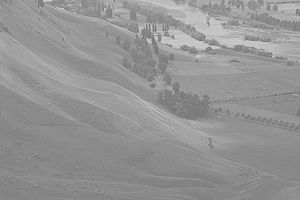

In [22]:
img = imread("../Imagenes/300px-Unequalized_Hawkes_Bay_NZ.jpg")

In [45]:
img_gray = convert(Array{Gray}, img);

LoadError: `convert` has no method matching convert(::Type{Array{Gray{T<:Union(FixedPoint,FloatingPoint)},N}}, ::ImageCmap{RGB{Float64},2,Array{Uint8,2}})
while loading In[45], in expression starting on line 1

In [24]:
function histogram(img)
    
    _, counts = hist(img[:], -1/256:1/256:1)

    s₁,s₂ = size(img_gray)
    return counts / (s₁ * s₂)
    
end


histogram (generic function with 1 method)

In [25]:
function imadjust2(img, low_in, hig_in, low_out, hig_out, γ)
    #out = similar(Images.separate(img))
    
    out = low_out + (hig_out - low_out) * ((img - low_in) / (hig_in - low_in)) .^ (γ)
    return out
end

imadjust2 (generic function with 1 method)

In [26]:
O = imadjust2(img_gray,.5, .75, 0, 1, 2);

In [27]:
h1 = histogram(img_gray);
h2 = histogram(O);
h3 = histogram(O2);

LoadError: O2 not defined
while loading In[27], in expression starting on line 3

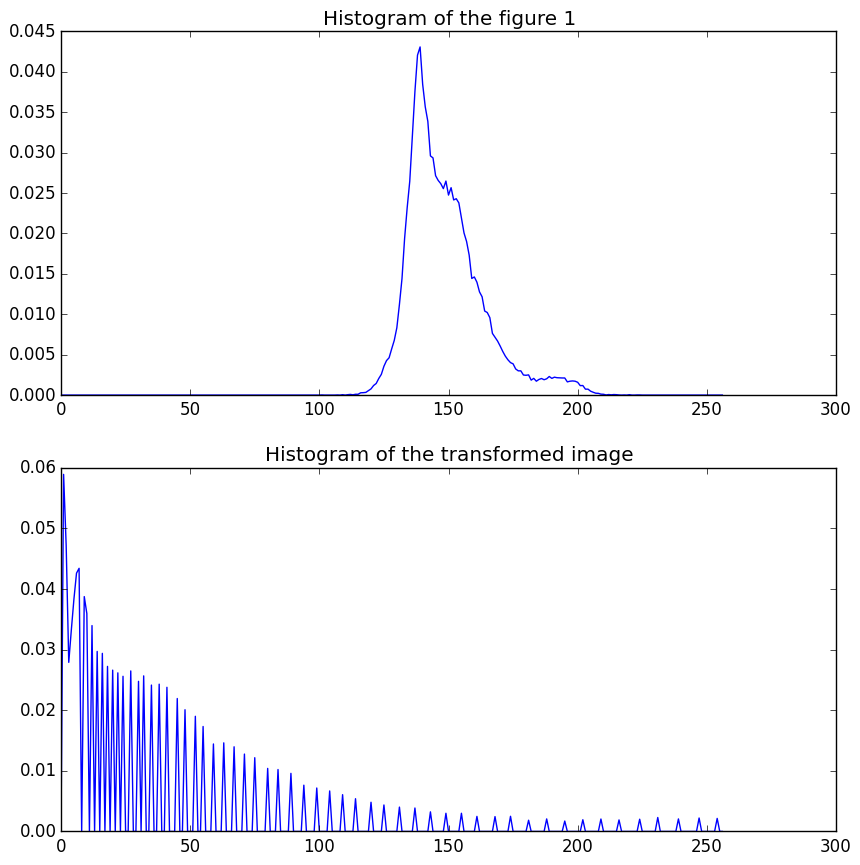

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xacf9844c>

In [28]:
#Plots with Matplotlib ¡¡¡
fig = PyPlot.figure(figsize=(10,10))

PyPlot.subplot(211)
PyPlot.title("Histogram of the figure 1")
PyPlot.plot(h1)

PyPlot.subplot(212)
PyPlot.title("Histogram of the transformed image")
PyPlot.plot(h2)

#Ejercicio 2
##Modificar el brillo y el contraste a las Imagenes tomadas en TP1 de manera que se puedan apreciar la mayor cantidad de detalles(tener en cuenta el histograma)

In [29]:
img_s = imstretch(img_gray, .3, 3)

LoadError: `+` has no method matching +(::Array{Gray{UfixedBase{Uint8,8}},2}, ::Gray{UfixedBase{Uint8,8}})
while loading In[29], in expression starting on line 1

#Ejercicio 3
##Mostrar mediante ejemplos los efectos que se producen en el histograma de una Imagen al aplicarle una ecualizacion por histograma

Si modelamos a los niveles de intensidad como variables continuas normalizadas en el intevalo cerrado: $[0;1]$ y si $p_{r}(r)$ la función de densidad de probabilidad de los niveles de intensidad en una imagen dada. Supongamos que realizamos la siguiente transformación a los niveles de intensidad de la imagen:

$$s = T(r)=\int_{0}^{r}p_{r}(\omega)d \omega$$

Se puede demostrar(*Gonzalez and Woods[2002]*) que la distribución de probabilidad de la salida es uniforme. O sea:

$$p_{s}(s)= \left\{ \begin{array}{lcc}
             1 &   para  & 0 \leq s \leq 1 \\
             0 & & eoc\\
             \end{array}
   \right.
$$

Como vemos la transformación que realizamos no es más que la función de distribución acumulativa de la función de distribución de probabilidad. 

In [30]:
h1_eq = cumsum(h1);

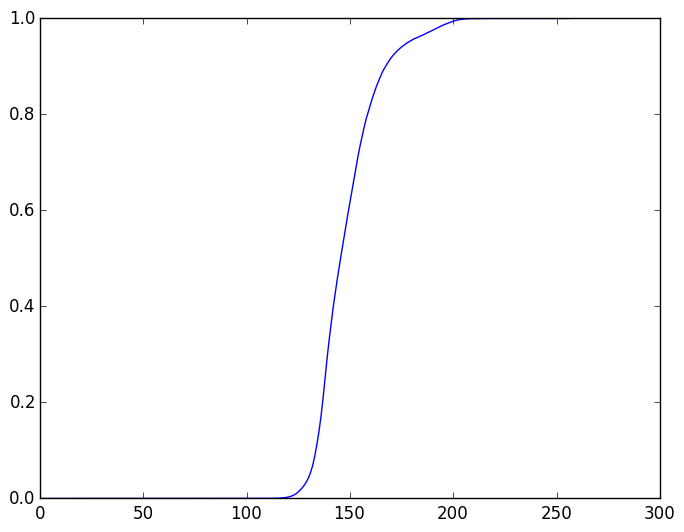

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xacebe22c>

In [31]:
PyPlot.plot(h1_eq)

Realizamos una función que realiza el proceso de ecualizar el histograma y transferir el nuevo mapa de grises

In [32]:
function eq_hist(img_gray)
    
    h = histogram(img_gray) # calculate the histogram
    h_eq = cumsum(h) # calculate the cumulative sum
    gr = [Gray(i) for i in h_eq] # generated the equalized grayscale map
    A = float(data(img_gray)) # convert to float
    dataint = iround(Uint8, 254*A + 1 ) # convert 1-254
    img_eq = ImageCmap(dataint, gr)
    
    return img_eq
end
    

eq_hist (generic function with 1 method)

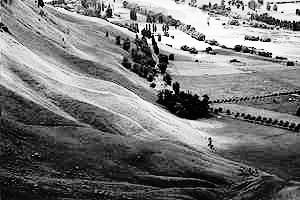

In [33]:
eq = eq_hist(img_gray)

#4- Desarrollar una funcion que permita realizar el efecto de falso color en una imagen dada 

Nos dan los perfiles con los que tenemos que trabajar:

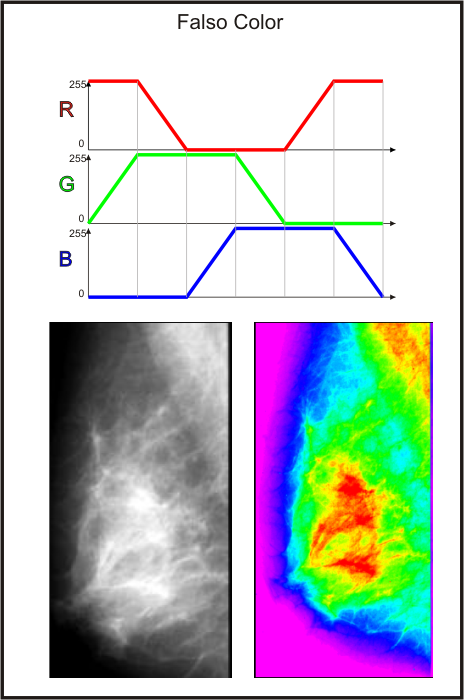

In [34]:
# false color patterns
f = imread("../Imagenes/Ejemplo\ RGB.bmp")

La mejor manera de realizar esto es con lo que se conoce como una *look-up-table* (LUT). En Images.jl existe una función que realiza este trabajo para cualquier mapa de colores que tengamos. 

In [38]:
function fc(img)
    
    # LUT colors
    red = zeros(256)
    green = zeros(256)
    blue = zeros(256)
    
    # red LUT
    red[1:43] = 1.0
    red[43:85] = linspace(1, 0, 43)
    red[172:214] = linspace(0, 1, 43)
    red[214:end] = 1.0
    red = red * RGB(1, 0, 0)
    # green LUT
    green[1:43] = linspace(0, 1, 43)
    green[43:129] = 1.0
    green[129:171] = linspace(1, 0, 43)
    green = green * RGB(0, 1, 0)
    # blue LUT
    blue[86:128] = linspace(0, 1, 43)
    blue[129:214] = 1.0
    blue[214:end] = linspace(1, 0, 43)
    blue = blue * RGB(0, 0, 1)
    
    A = float(data(img)) # convert to float
    dataint = iround(Uint8, 254*A + 1 ) # convert
    false_color = red + green + blue # blend the colors
    img_fc = ImageCmap(dataint, false_color)
    
    return img_fc
end


fc (generic function with 1 method)

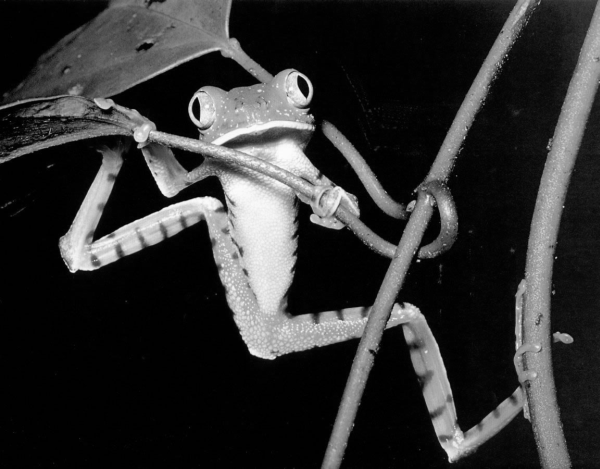

In [48]:
img = imread("../Imagenes/Rana2.bmp")

elapsed time: 0.243874352 seconds (12703420 bytes allocated, 63.76% gc time)


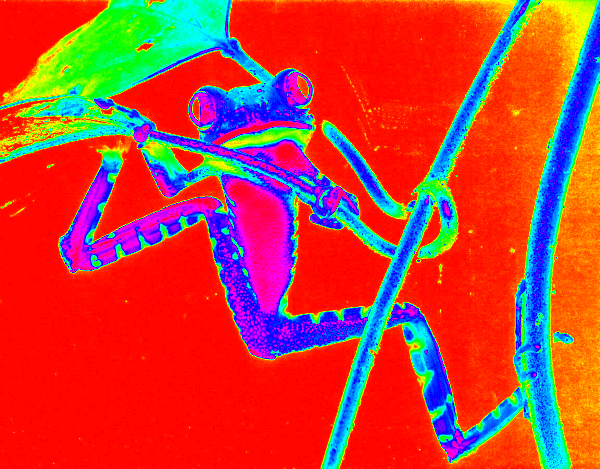

In [61]:
img_g = convert(Array{Gray},img)
@time img_fc = fc(img_g)

#5- Para dos Imágenes distintintas (en escala de grises) acentuar los bordes utilizando los filtros “Laplacian Sharpening” y “Hight Boost Filter”